In [5]:
import pandas as pd

df = pd.read_csv("orders.csv", encoding="latin1")
df.head()



,row_ID,order_ID,order_date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape


(9994, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_ID         9994 non-null   int64  
 1   order_ID       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
total_sales = df["Sales"].sum()
total_sales


np.float64(2297200.8603)

In [7]:
total_profit = df["Profit"].sum()
total_profit


np.float64(286397.0217)

In [6]:
total_orders = df["order_ID"].nunique()
total_orders



5009

In [9]:
avg_discount = df["Discount"].mean()
avg_discount


np.float64(0.1562027216329798)

In [10]:
df["Profit_Status"] = df["Profit"].apply(
    lambda x: "Profit" if x > 0 else "Loss"
)

df["Profit_Status"].value_counts()


Profit_Status
Profit    8058
Loss      1936
Name: count, dtype: int64

In [8]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["Month"] = df["order_date"].dt.month
df["Year"] = df["order_date"].dt.year
monthly_sales = df.groupby(["Year", "Month"])["Sales"].sum()
monthly_sales.head()



Year  Month
2014  1        14236.895
      2         4519.892
      3        55691.009
      4        28295.345
      5        23648.287
Name: Sales, dtype: float64

In [10]:
# Total Sales
total_sales = df["Sales"].sum()

# Total Profit
total_profit = df["Profit"].sum()

# Total Orders (unique orders)
total_orders = df["order_ID"].nunique()

# Average Discount
avg_discount = df["Discount"].mean()



In [11]:
print("Total Sales:", round(total_sales, 2))
print("Total Profit:", round(total_profit, 2))
print("Total Orders:", total_orders)
print("Average Discount:", round(avg_discount, 2))


Total Sales: 2297200.86
Total Profit: 286397.02
Total Orders: 5009
Average Discount: 0.16


In [12]:
summary_text = f"""
Retail Sales Summary Report

Total Sales: {round(total_sales, 2)}
Total Profit: {round(total_profit, 2)}
Total Orders: {total_orders}
Average Discount: {round(avg_discount, 2)}

Key Insight:
The business generated healthy sales with controlled discounting.
Monthly and category level analysis was used to identify trends and losses.
"""

print(summary_text)



Retail Sales Summary Report

Total Sales: 2297200.86
Total Profit: 286397.02
Total Orders: 5009
Average Discount: 0.16

Key Insight:
The business generated healthy sales with controlled discounting.
Monthly and category level analysis was used to identify trends and losses.



In [14]:

monthly_sales.to_excel("Monthly_Sales.xlsx")


In [15]:
df.to_excel("Final_Clean_Orders.xlsx", index=False)


In [17]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["Month_Name"] = df["order_date"].dt.month_name()



In [18]:
monthly_chart = df.groupby("Month_Name")["Sales"].sum()


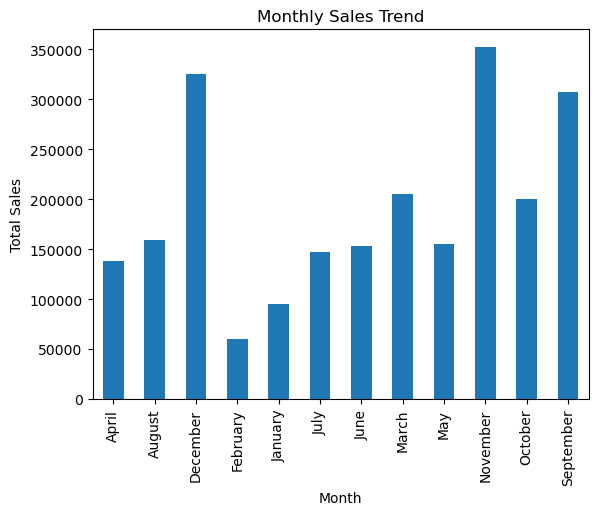

In [19]:
import matplotlib.pyplot as plt

monthly_chart.plot(kind="bar")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [20]:
category_summary = df.groupby("Category").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum"),
    Avg_Discount=("Discount", "mean")
)


In [21]:
category_summary.to_excel("Category_Summary.xlsx")


In [22]:
pd.read_excel("Monthly_Sales.xlsx")


,Year,Month,Sales
0,2014.0,1,14236.8950
1,NaN,2,4519.8920
2,NaN,3,55691.0090
3,NaN,4,28295.3450
4,NaN,5,23648.2870
5,NaN,6,34595.1276
6,NaN,7,33946.3930
7,NaN,8,27909.4685
8,NaN,9,81777.3508
9,NaN,10,31453.3930
